# Clase!

## Contenidos:
* [Groupby](#groupby)
* [Merge](#merge)
* [Melt](#melt)
* [Sanity-Check](#sc)
## Motivación:
Manipular datos con pandas es sencillo, hacer agrupaciones, cruces y reformatos se logra de manera intuitiva. A continuación veremos un par de ejemplos de como hacer estas acciones.

OBS: Al contrario de NumPy, Pandas esta orientado a los datos (no a los algoritmos/calculos), por eso, las estructuras de datos que usan son distintas:
 * Numpy: Usan array, lo que es equivalente a una matriz, su tamaño no es mutable y el tipo de data (*dtype*) debería ser única dentro del arreglo.
 * Pandas: Usan Series y DataFrame (*a Series of Series*), estos pueden modificar su tamaño y pueden contener cualquier tipo de datos

Primero, Importamos las librerías correspondientes

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

Estos son los alias estandar para estas librerías

In [2]:
%matplotlib inline
#permite que los gráficos se muestren en el notebook

### Groupby: <a id = "groupby"></a>
Esta operación permite agrupar registros basados en distintas operaciones:
 1. Conteo (*.count()*, *size()* )
 2. Suma (*.sum()* )
 3. Media (*.mean()* )
 4. Desviación estandar (*.str()* (dentro de cada grupo))
 5. Custom (revisar [documentación de los objetos DataFramegroupby y aggregate](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html))

Ahora generemos los datos:

In [3]:
n=1000 #cantidad de registros
edad = (np.random.randint(low=18,high=80,size=n)) #TIP: presione shift+tab dentro de una funcion para ver su *signature*
inc = np.random.normal(400e3,5e3,size=n)
reg = (np.random.randint(low=0,high=13,size=n))

In [4]:
df = pd.DataFrame({'edad':edad,
                   'income':inc,
                   'region':reg
                  }) # Creamos el pandas.DataFrame como un diccionario de listas o arreglos

Agreguemos alguna interacción para que no sea tan fome...

In [5]:
df = pd.DataFrame({'edad':edad,
                   'income':inc,
                   'region':reg
                  }) # Creamos el pandas.DataFrame como un diccionario de listas o arreglos
df.income = ((df.edad.values-55)*4)**2 + df.income.values - df.region*1e4
display(df.head(5)) # primeros 5 registros
display(df.tail(5)) # últimos 5 registros

,edad,income,region
0,54,277462.571552,12
1,51,398123.707066,0
2,22,353265.962850,7
3,58,380695.065730,2
4,57,333315.722044,7


,edad,income,region
995,18,308406.180477,12
996,61,294132.774941,10
997,61,387329.930212,1
998,29,289885.160543,12
999,24,406726.228774,1


In [6]:
def rango(edad): # TIP: Cualquier función que tenga un Docstring, se puede verificar con shift+tab 
    '''Calcula en que rango de edad cae un registro, toma un float.
    Retorna: str
    ''' # <--- este es el Docstring
    if edad<35:
        return 'joven'
    elif edad<55:
        return 'menos joven'
    else:
        return 'mayor'
    

Aplica la funcion rango a toda la columna edad y se la asigna a la columna *rango edad*

In [7]:
df['rango edad'] = df.edad.apply(rango) 
df.head(10)

,edad,income,region,rango edad
0,54,277462.571552,12,menos joven
1,51,398123.707066,0,menos joven
2,22,353265.962850,7,joven
3,58,380695.065730,2,mayor
4,57,333315.722044,7,mayor
5,66,343927.433361,5,mayor
6,34,362458.918846,5,joven
7,19,307663.374688,12,joven
8,70,327843.276597,7,mayor
9,72,358651.330496,4,mayor


Agrupemos el income por rango de edad, primero contemos cuantos registros hay en cada clase

In [8]:
df[['rango edad','income']].groupby('rango edad')

In [9]:
display(df[['rango edad','income']].groupby('rango edad').count())

,income
rango edad,
joven,296
mayor,392
menos joven,312


veamos ahora el promedio y la desviación estandar por cada grupo

In [10]:
display(df[['rango edad','income']].groupby('rango edad').mean())
display(df[['rango edad','income']].groupby('rango edad').std())

,income
rango edad,
joven,351724.665827
mayor,341704.084677
menos joven,340816.443792


,income
rango edad,
joven,37301.744361
mayor,35825.121734
menos joven,37367.997642


In [11]:
df[['rango edad','region','income']].groupby(['rango edad','region']).mean()

income
rango edad  region               
joven       0       414821.680323
            1       402036.797783
            2       393002.120622
            3       383697.262930
            4       374906.486692
            5       365480.572673
            6       354268.717714
            7       343311.166578
            8       333619.763921
            9       322865.951271
            10      313186.752818
            11      303386.402072
            12      294502.890419
mayor       0       404147.487288
            1       391633.802985
            2       381323.135708
            3       372229.478743
            4       362698.065425
            5       352847.292792
            6       342316.532689
            7       331966.568517
            8       322834.561998
            9       312258.076713
            10      303996.134000
            11      294948.736622
            12      282141.693306
menos joven 0       403528.249175
            1       392245.257772
            2       383197.718618
            3       372174.860325
            4       362601.187582
            5       351954.567713
            6       343414.628699
            7       335064.191244
            8       321903.814049
            9       312815.989604
            10      301626.826891
            11      292545.958033
            12      281584.634453

In [12]:
grouped = df[['rango edad','region','income']].groupby(['rango edad','region']).std()
grouped


income
rango edad  region             
joven       0       6739.442520
            1       8507.957667
            2       6264.616314
            3       5176.261786
            4       6930.807191
            5       7455.197125
            6       8216.468701
            7       8402.938838
            8       7627.521788
            9       5945.609406
            10      7187.538228
            11      8177.697836
            12      7143.705163
mayor       0       5148.421712
            1       6060.135857
            2       5482.326878
            3       4846.810385
            4       6253.221368
            5       7077.483642
            6       6149.225449
            7       5826.707642
            8       6004.541165
            9       6297.358421
            10      7332.923152
            11      4881.938889
            12      4219.325567
menos joven 0       4992.045394
            1       5959.794834
            2       4194.401959
            3       5854.329111
            4       6323.788960
            5       5681.462826
            6       5172.010666
            7       6776.424847
            8       4920.442910
            9       4802.145441
            10      5119.663733
            11      5439.341630
            12      5176.268444

In [13]:
grouped.loc['menos joven',0]

income    4992.045394
Name: (menos joven, 0), dtype: float64

In [14]:
df[(df.edad>30) & (df.edad<50) & (df.region == 2) ][['edad','income']].describe()

,edad,income
count,24.000000,24.000000
mean,37.625000,385941.642235
std,5.562393,5239.976839
min,31.000000,376819.677991
25%,32.000000,383084.883391
50%,39.000000,386351.003295
75%,40.750000,388278.174961
max,48.000000,396775.069005


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f17ea7f0dd8>,
      dtype=object)

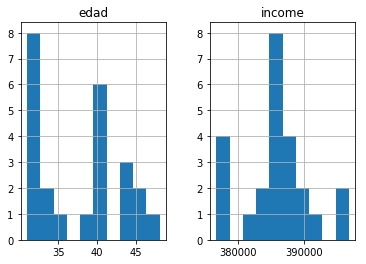

In [15]:
df[(df.edad>30) & (df.edad<50) & (df.region == 2) ][['edad','income']].hist()

### Merge <a id='merge'> </a>
Merge es la operación equivalente a los *join* en *SQL*, nos permite juntar dos dataframes basado en los valores de una columna.

Notemos que existen distintas maneras de hacer eso:
 * Inner.
 * Outer.
 
Para más detalles estudie la documentación en este [link](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html).

Ahora definamos un poco de metadata para pegarselo a nuestro dataframe original

In [16]:
df_meta = pd.DataFrame({'grupo etario':['menor de edad','joven','menos joven','mayor'],
                        'clasificacion':[0,1,2,3],
                        'ingreso_promedio':[352000, 343000, 347000,np.nan]
                       })
df_meta

,clasificacion,grupo etario,ingreso_promedio
0,0,menor de edad,352000.0
1,1,joven,343000.0
2,2,menos joven,347000.0
3,3,mayor,NaN


Juntemos nuestro dataframe anterior con esta nueva información que tenemos...

In [17]:
merged = pd.merge(df,df_meta, # df es el left (izquierda de la coma) df_meta es el right (derecha de la coma)
                  left_on='rango edad', # nombre de la llave en el dataframe de la izquierda
                  right_on='grupo etario', # nombre de la llave en el dataframe de la izquierda
                  how='inner',
                  indicator=True # agrega una columna _merge, que dice que registros estaban en que dataframe
                 )
merged.head()

,edad,income,region,rango edad,clasificacion,grupo etario,ingreso_promedio,_merge
0,54,277462.571552,12,menos joven,2,menos joven,347000.0,both
1,51,398123.707066,0,menos joven,2,menos joven,347000.0,both
2,50,386511.037325,1,menos joven,2,menos joven,347000.0,both
3,35,323785.807385,9,menos joven,2,menos joven,347000.0,both
4,47,286340.574789,12,menos joven,2,menos joven,347000.0,both


Veamos como difieren el income del del ingreso promedio  

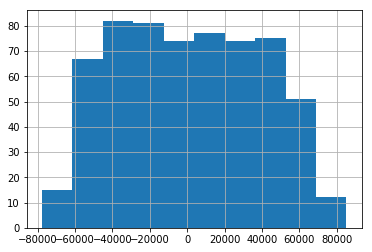

In [18]:
(merged.income - merged.ingreso_promedio).hist() 

#### Ejemplo con dos llaves
En ciertos casos, necesitamos pegar DataFrames usando varias columnas, esta situación es trivial usando pd.merge.

Veamos un caso nuevo...

In [19]:
cuentas = np.random.randint(low=100,high=200,size=10000)*17000 
opes = np.random.randint(low=100,high=200,size=10000)
df_registros = pd.DataFrame({'cuenta':cuentas,
                               'operacion':opes,
                              'moroso': np.random.binomial(1,0.05,size=10000)})
df_registros = df_registros[['cuenta',
                               'operacion',
                              'moroso']] 

In [20]:
df_registros = df_registros.sort_values(['cuenta','operacion']) # así ordenamos un dataframe en base a una columna

In [21]:
df_llaves = df_registros[['cuenta','operacion']].drop_duplicates().copy()
df_llaves = df_llaves.reset_index()

In [22]:
df_llaves.head()

,index,cuenta,operacion
0,2984,1700000,100
1,9695,1700000,104
2,7552,1700000,109
3,678,1700000,110
4,2501,1700000,111


In [23]:
df_registros = df_registros.reset_index() 
df_registros.pop('index')
df_registros.head()

,cuenta,operacion,moroso
0,1700000,100,0
1,1700000,100,1
2,1700000,104,1
3,1700000,109,0
4,1700000,110,0


Unamos la de registros, con su llave única, ¿Como haríamos esto?...

Necesitamos unir por cuenta y operación!

In [24]:
merged = pd.merge(df_registros,df_llaves,
                  how='inner',
                  left_on=['cuenta','operacion'],
                  right_on=['cuenta','operacion'])
merged.head()

,cuenta,operacion,moroso,index
0,1700000,100,0,2984
1,1700000,100,1,2984
2,1700000,104,1,9695
3,1700000,109,0,7552
4,1700000,110,0,678


De hecho, si los DataFrames contienen columnas con mismos nombres, el merge se hace sobre esas columnas, por lo que el código anterior se reduce a:

In [25]:
merged = pd.merge(df_registros,df_llaves,
                  how='inner',
                    )
merged.head()

,cuenta,operacion,moroso,index
0,1700000,100,0,2984
1,1700000,100,1,2984
2,1700000,104,1,9695
3,1700000,109,0,7552
4,1700000,110,0,678


### Melt <a id ='melt'> </a>

Esta operación permite reestructurar un Dataframe a un formato que sea más sencillo de manipular ([link a documentación](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html)).

Generemos datos para un ejemplo:

In [26]:
data = { i:[np.random.randint(low=1,high=11)
            for j in range(7)
           ]
        for i in range(10)
       }
cols=['person {}'.format(i) for i in range(10)]
to_melt = pd.DataFrame(data)
to_melt.columns=cols
to_melt['year']= range(2010,2017)
to_melt

,person 0,person 1,person 2,person 3,person 4,person 5,person 6,person 7,person 8,person 9,year
0,5,7,3,9,6,6,4,8,4,10,2010
1,3,5,1,3,7,4,6,4,4,8,2011
2,4,5,6,2,5,8,9,1,5,1,2012
3,3,9,4,7,3,9,3,5,2,9,2013
4,9,4,1,4,7,8,10,7,7,1,2014
5,7,7,3,6,4,1,5,8,5,10,2015
6,1,7,1,2,10,1,2,8,6,10,2016


In [27]:
melted = pd.melt(to_melt, id_vars=['year'], var_name='Name')
melted.head()

,year,Name,value
0,2010,person 0,5
1,2011,person 0,3
2,2012,person 0,4
3,2013,person 0,3
4,2014,person 0,9


### P:¿Qué pasó???!!!


R1:Magia.

R2: Pandas tomó todas las columnas que no estaban especificadas en el parámetros *id_vars* y los colocó en la columna **Name** (*var_name*) y por cada registro que existía en esa columna, creó un registro en el nuevo dataframe (*melted*), por lo que: 

    len(melted)=len(to_melt)x(len(to_melt.columns)-len(id_vars)).
    
A veces, tenemos que *derretir* un DataFrame basado en varias columnas, para eso tenemos el ejemplo siguiente:

**SPOILER-ALERT**: es tan sencillo como especificar las columnas en el parámetro *id_vars*

#### Ejemplo con dos columnas.

Generemos un DataFrame para el que tenga sentido hacer esta operación (por ejemplo, un dataframe con cuenta, operación y periodo mora...)

In [28]:
data = { i:[np.random.binomial(1,0.1)
            for j in range(20)
           ]
        for i in range(24)
       }
cols=['periodo mora {}'.format(i) for i in range(24)]
to_melt = pd.DataFrame(data)
to_melt.columns=cols
to_melt['cuenta']= range(19,19+20)
to_melt['codigo']= np.random.randint(low=1000,high=2000,size=20)
to_melt = to_melt[list(to_melt.columns[-2:])
                  +list(to_melt.columns[:-2])
                 ]
to_melt

,cuenta,codigo,periodo mora 0,periodo mora 1,periodo mora 2,periodo mora 3,periodo mora 4,periodo mora 5,periodo mora 6,periodo mora 7,...,periodo mora 14,periodo mora 15,periodo mora 16,periodo mora 17,periodo mora 18,periodo mora 19,periodo mora 20,periodo mora 21,periodo mora 22,periodo mora 23
0,19,1176,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,20,1475,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,21,1695,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22,1171,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,1913,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,24,1281,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,25,1221,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,26,1885,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,27,1567,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,28,1832,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Si quisieramos trabajar este dataframe como algo vertical, deberíamos usar la funcion *melt*.

In [29]:
id_vars=['cuenta','codigo']
melted = pd.melt(to_melt,
                 id_vars=id_vars, # así de sencillo! 
                 var_name='Periodo Mora',
                 value_name='Flag mora'
                )

melted_and_sorted = melted.sort_values(['cuenta',
                                        'codigo']
                                      ) # ordenemos el DF segun cuenta y operación, para que sea más boni.
melted_and_sorted.head(24)

,cuenta,codigo,Periodo Mora,Flag mora
0,19,1176,periodo mora 0,0
20,19,1176,periodo mora 1,0
40,19,1176,periodo mora 2,0
60,19,1176,periodo mora 3,0
80,19,1176,periodo mora 4,0
100,19,1176,periodo mora 5,0
120,19,1176,periodo mora 6,0
140,19,1176,periodo mora 7,0
160,19,1176,periodo mora 8,0
180,19,1176,periodo mora 9,0


Si hubieramos olvidado agrega *'codigo'* al parámetro *id_vars* habríamos conseguido lo siguiente:

In [30]:
melted = pd.melt(to_melt, id_vars=['cuenta'], var_name='Mora')
melted_and_sorted = melted.sort_values(['cuenta'])
print(len(melted_and_sorted)) # Sobran valores!
melted_and_sorted.head(24)

500


,cuenta,Mora,value
0,19,codigo,1176
440,19,periodo mora 21,0
60,19,periodo mora 2,0
420,19,periodo mora 20,0
80,19,periodo mora 3,0
400,19,periodo mora 19,0
100,19,periodo mora 4,0
380,19,periodo mora 18,0
120,19,periodo mora 5,0
360,19,periodo mora 17,0


Ahora en la columna mora, tenemos de vez en cuando un item con el valor "codigo", el cual debería ser otra columna!

# Sanity-Check <a id='sc'><a>
Como haríamos un Sanity-Check en python¿?
Revisaremos 3 pasos:
 1. Validar DV.
 2. Botar duplicados.
 3. Contar difuntos/interdictos.

Primero hagamos un data set.

In [31]:
n=1000000 #cantidad de registros
data = {'ID': [ ' persona {}'.format(i)
              for i in range(n)], #TIP: las *list comprehension* permiten una escritura concisa de expresiones complejas
        
        'rut': ['{}-{}'.format(i,np.random.randint(low=0,high=9))
               for i in range(1700000,1700000+n)],
        
        'difunto' : np.random.binomial(1,0.01,size=n), 
        
        'interdicto':np.random.binomial(1,0.005,size=n)
       }
DF = pd.DataFrame(data)

In [32]:
def is_valid(rut,DV):
    ''' El primer argumento es la parte numerica del rut (float o str)
        y DV es el digito verificador en formato string
    '''
    rut_reversed = str(rut)[::-1] #revertimos los ruts
    rut_array = np.array(list(rut_reversed),dtype=int) #ahora lo guardamos en un array, como tipo numerico
    coefs = np.arange(len(rut_array))%6+2 # generamos los coeficientes correspondientes
    # print(rut_array)
    # print(coefs)
    suma = np.sum(coefs*rut_array) 
    # print(suma)
    digit =  11 -  suma%11 # calculamos el digito
    # print(digit)
    if digit == 10: # si es 10 lo reemplazamos por k
        DV_calculado = 'k'
    else:
        DV_calculado = str(digit) # si no, lo convertimos el int a str
    return DV == DV_calculado

Forma 1 (la mala (lenta))

In [33]:
DF['rut_sin_DV'] = DF.rut.apply(lambda x: int(x.split('-')[0]))
DF['DV'] = DF.rut.apply(lambda x: str(x.split('-')[1]))


la manera anterior no la usaremos porque me parece menos pythonista

Forma 2 (la no tan mala (menos lenta))


In [34]:
DF['Split'] = DF.rut.str.split('-')

In [35]:
#%%timeit
DF['is_valid'] = DF.Split.apply(lambda x: is_valid(int(x[0]),x[1]))

Veamos cuantos registros válidos tenemos... (usemos groupby?)

In [36]:
DF_valid = DF[DF.is_valid] 
DF.groupby('is_valid').size()

is_valid
False    919426
True      80574
dtype: int64

Esa cantidad exagerada se debe a que agregamos el DV de manera aleatoria, por lo que era esperable.

Veamos ahora los duplicados, para eso existe el método *.drop_duplicates()*, recordemos además que queremos botar los duplicados en el rut, independiente de las otras columnas, para eso usemos el parámetros *subset*

In [37]:
DF_not_duplicates = DF_valid.drop_duplicates(subset=['rut'])

Por la manera en que generamos los registros, que podemos esperar de de esta operación?

Por último, verifiquemos los cuantos difuntos e interdictos tenemos (para variar, groupby...)

In [38]:
DF_not_duplicates[['difunto','ID']].groupby('difunto').count()

,ID
difunto,
0,79794
1,780


In [39]:
DF_not_duplicates[['interdicto','ID']].groupby('interdicto').count()

,ID
interdicto,
0,80142
1,432


Ahora ambas clases juntas!

In [40]:
DF_not_duplicates[['difunto','interdicto','ID']].groupby(['difunto','interdicto']).count()

ID
difunto interdicto       
0       0           79368
        1             426
1       0             774
        1               6

Seleccionemos los que no están difuntos ni interdictos: (usaremos la técnica llamada *masking*)

In [41]:
DF_clean = DF_not_duplicates[(DF_not_duplicates.difunto==0) 
                             & (DF_not_duplicates.interdicto==0)]
print(len(DF_clean))

79368


Del millón de registros, sobrevivieron 79431, pero estamos seguros que estos son válidos.